# Data analysis of GW150914

Download calibrated data timeseries from LIGO Hanford and Livingston observatories using gwpy.

In [3]:
from gwpy.timeseries import TimeSeries
h1 = TimeSeries.fetch_open_data('H1', 1126259457, 1126259467)
l1 = TimeSeries.fetch_open_data('L1', 1126259457, 1126259467)

## 1. Print the raw data

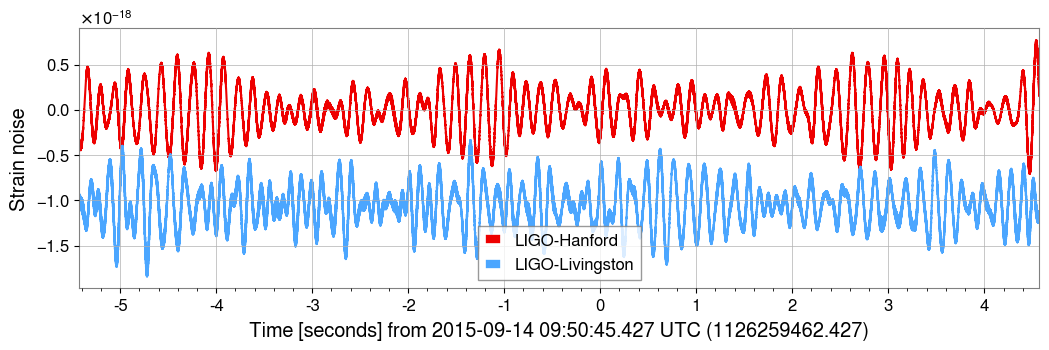

In [5]:
from gwpy.plot import Plot
%matplotlib inline
plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(l1, color='gwpy:ligo-livingston', label='LIGO-Livingston')
ax.set_epoch(1126259462.427)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

## 2. Analyse the data from both observatories in the frequency domain.

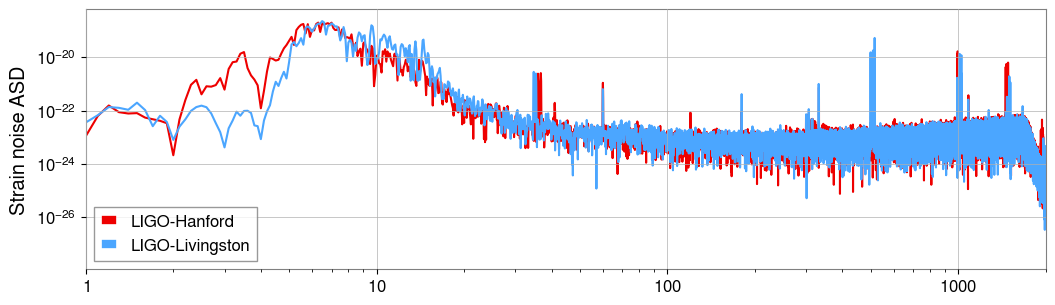

In [6]:
h1_asd = h1.asd(method='scipy_welch')
l1_asd = l1.asd(method='scipy_welch')

plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1_asd, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(l1_asd, color='gwpy:ligo-livingston', label='LIGO-Livingston')
ax.set_ylabel('Strain noise ASD')
ax.set_xlim(1, 2000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plot.show()

## 3. Using data from Hanford, select only the interesting part of the spectra.

The corresponding frequency band to the expected GW signal lays between 50Hz and 250Hz.

Plot the filtered signal.

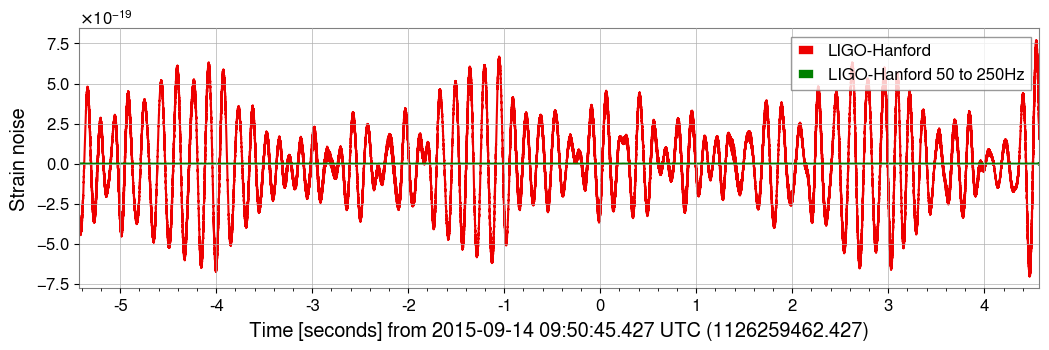

In [8]:
h1_BP = h1.bandpass(50, 250)

plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(h1_BP, color='green', label='LIGO-Hanford 50 to 250Hz')
ax.set_epoch(1126259462.427)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

## 4. Compare the raw data amplitude spectral density with the filtered signal ASD.

As in the time domain, the most excess of noise was removed. You can see the two noise peaks in the band from 50 to 250Hz. It is a contribution form the power supply network (In USA 60Hz, in Europe 50Hz).

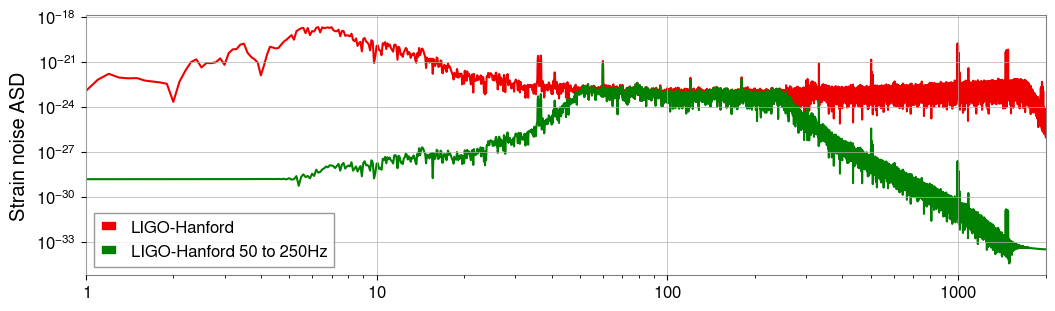

In [9]:
h1_BP_asd = h1_BP.asd(method='scipy_welch')

plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1_asd, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(h1_BP_asd, color='green', label='LIGO-Hanford 50 to 250Hz')
ax.set_ylabel('Strain noise ASD')
ax.set_xlim(1, 2000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plot.show()

## 5. Remove 60Hz contribution comming form the power network and its first harmonic frequency.

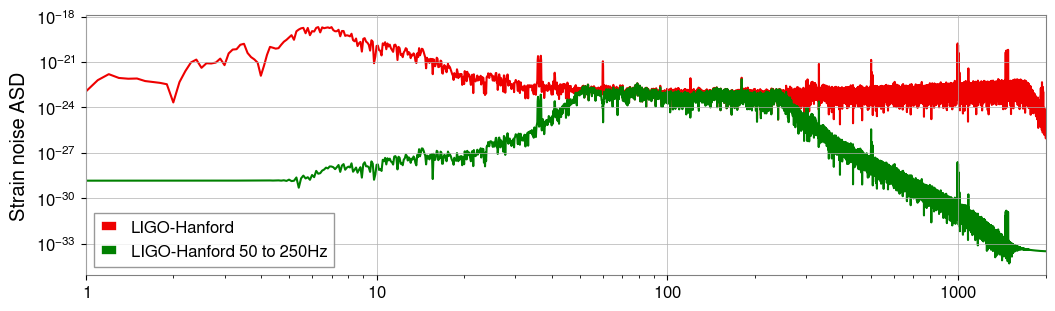

In [11]:
h1b = h1_BP.notch(60).notch(120)
h1b_asd = h1b.asd(method='scipy_welch')

plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1_asd, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(h1b_asd, color='green', label='LIGO-Hanford 50 to 250Hz')
ax.set_ylabel('Strain noise ASD')
ax.set_xlim(1, 2000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plot.show()

## 6. Try to find the gravitational signal by eye.

High noise level at the begining and at the end of the time series is due to the filtering precedure.

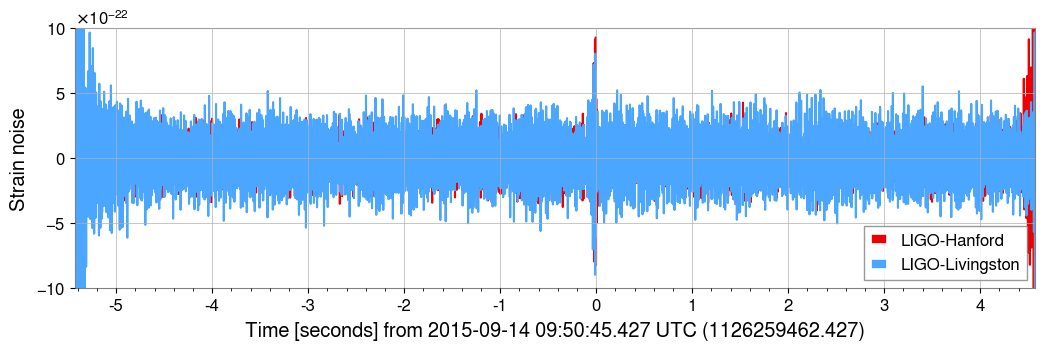

In [12]:
l1b = l1.bandpass(50,250).notch(60).notch(120)

plot = Plot(figsize=(12, 4))
ax = plot.gca()
ax.set_xscale('auto-gps')
ax.plot(h1b, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(l1b, color='gwpy:ligo-livingston', label='LIGO-Livingston')
ax.set_epoch(1126259462.427)
ax.set_ylim(-1e-21, 1e-21)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

## 7. In the scientific way we must use a template.